## Model Evaluation (model v2)

#### Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load model_fit file

In [3]:
#directory (folder) for model v2
input_dir = os.path.join('..', 'data', 'processed', 'model_v2')

plots_dir = os.path.join('..', 'data', 'figures', 'model_v2')

lin_model = load(os.path.join(input_dir, 'lin_model_v2_1.joblib'))
rf_model = load(os.path.join(input_dir, 'forest_model_v2_1.joblib'))
nnet_model = load(os.path.join(input_dir, 'neural_model_v2_1.joblib'))

#### Load in test and train data

In [4]:
X_train = pd.read_csv(os.path.join(input_dir, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(input_dir, 'X_test.csv'))
y_train = np.array(pd.read_csv(os.path.join(input_dir, 'y_train.csv'))['target'])
y_test = np.array(pd.read_csv(os.path.join(input_dir, 'y_test.csv'))['target'])

In [5]:
X_train = X_train.rename(columns={
    'c09_other_wires': 'c09',
    'c09_restructured': 'c09b',
    'c09_vert_int': 'c09c',
    
})
X_test = X_test.rename(columns={
    'c09_other_wires': 'c09',
    'c09_restructured': 'c09b',
    'c09_vert_int': 'c09c',
    
})

#### Predict on test set using trained models

In [6]:
y_pred_lin = lin_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nnet = nnet_model.predict(X_test)

/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c09
- c09b
- c09c
Feature names seen at fit time, yet now missing:
- c09_other_wires
- c09_restructured
- c09_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- c09
- c09b
- c09c
Feature names seen at fit time, yet now missing:
- c09_other_wires
- c09_restructured
- c09_vert_int

  warnings.warn(message, FutureWarning)
/home/julian/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature 

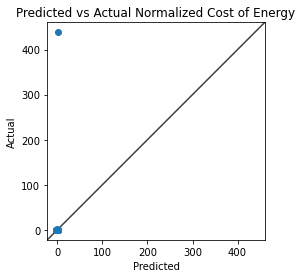

In [7]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})

fig, ax = plt.subplots()
ax.scatter(y_pred_lin, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'lm_actual_vs_pred_scatter.png'), dpi=300)

In [8]:
# lin_df[lin_df['Actual'] > 10]
lin_df

,Actual,Predicted
0,0.065813,-1.123389
1,-0.017532,2.074596
2,0.034066,0.630468
3,0.041836,0.236960
4,0.024043,0.242741
...,...,...
210,0.071436,0.427473
211,0.085105,0.249576
212,-0.026935,-0.562345
213,0.076367,-0.193515


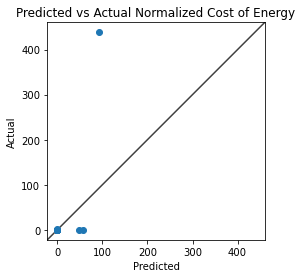

In [9]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

fig, ax = plt.subplots()
ax.scatter(y_pred_rf, y_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predicted vs Actual Normalized Cost of Energy')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig(os.path.join(plots_dir, 'rf_actual_vs_pred_scatter.png'), dpi=300)

#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

In [10]:
bias_lin = sum(y_pred_lin - y_test)
bias_rf = sum(y_pred_rf - y_test)

print("Bias of Linear Regression: {}".format(bias_lin))
print("Bias of Random Forest: {}".format(bias_rf))

Bias of Linear Regression: -326.20730810343196
Bias of Random Forest: -242.36801450523097


(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [11]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("MAE of Linear Regression: {}".format(mae_lin))
print("MAE of Random Forest Model: {}".format(mae_rf))

MAE of Linear Regression: 2.8511895711491184
MAE of Random Forest Model: 2.137554408326399


(c) Root Mean Square Error := $\sqrt{\frac{1}{n} \sum (\hat{y_i} - y_i)^2}$

In [12]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RMSE of Linear Regression: {}".format(rmse_lin))
print("RMSE of Random Forest: {}".format(rmse_rf))

RMSE of Linear Regression: 29.76112936350808
RMSE of Random Forest: 24.143872638281334


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [13]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print("R^2 of Linear Regression: {}".format(r2_lin))
print("R^2 of Random Forest: {}".format(r2_rf))

R^2 of Linear Regression: 0.0043459353188400884
R^2 of Random Forest: 0.34472512118877274


[0.19530254 0.02053476 0.53014203 0.15175003 0.0348578  0.01129251
 0.01076165 0.02652324 0.01199936 0.00225218 0.00458389]


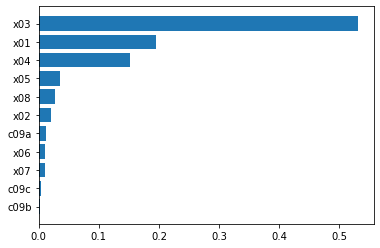

In [14]:
print(rf_model.feature_importances_)
variable_importance_df = pd.DataFrame({
    'variable': np.array(['x01', 'x02', 'x03', 'x04', 'x05', 'x06', 'x07', 'x08', 'c09a', 'c09b', 'c09c']),
    'values': rf_model.feature_importances_,
})
variable_importance_df = variable_importance_df.sort_values(by=['values'])
plt.barh(variable_importance_df['variable'], variable_importance_df['values'])
plt.savefig(os.path.join(plots_dir, 'rf_variable_importance_plot.png'), dpi=300)

#### Coefficient value estimates, p-values and std error for each feature variable

In [15]:
results = pd.DataFrame({
    'variables': X_train.columns,
    'coeff': lin_model.coef_,
})
results

,variables,coeff
0,x01,0.069999
1,x02,0.053122
2,x03,-0.450290
3,x04,-0.398708
4,x05,0.016382
5,x06,0.024418
6,x07,-0.035424
7,x08,-0.148892
8,c09,1.801288
9,c09b,0.781608


Train fit analysis from OLS statsmodel package

In [16]:
import statsmodels.api as sm

In [17]:
X2_train = sm.add_constant(X_train)
ols_result = sm.OLS(y_train, X2_train).fit()
ols_result.summary()

/home/julian/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3687
Date:                Wed, 25 May 2022   Prob (F-statistic):              0.968
Time:                        17:53:05   Log-Likelihood:                -3531.2
No. Observations:                 856   AIC:                             7086.
Df Residuals:                     844   BIC:                             7143.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1997      6.240     -0.032      0.974     -12.446      12.047
x01            0.0700      0.629      0.111      0.911      -1.164       1.304
x02            0.0531      0.567      0.094      0.925      -1.060       1.166
x03           -0.4503      0.598     -0.753      0.451      -1.623       0.723
x04           -0.3987      0.509     -0.783      0.434      -1.398       0.601
x05            0.0164      0.464      0.035      0.972      -0.895       0.927
x06            0.0244      0.590      0.041      0.967      -1.133       1.182
x07           -0.0354      0.538     -0.066      0.948      -1.091       1.020
x08           -0.1489      0.740     -0.201      0.841      -1.602       1.304
c09            1.8013      6.323      0.285      0.776     -10.610      14.212
c09b           0.7816      6.700      0.117      0.907     -12.368      13.932
c09c           0.2743      6.273      0.044      0.965     -12.037      12.586
==============================================================================
Omnibus:                     2280.444   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25452681.408
Skew:                          28.994   Prob(JB):                         0.00
Kurtosis:                     845.772   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Partial dependence plots